In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
import seaborn as sns
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [2]:
df = pd.read_csv('C:\\Nikhil\\DS\\ML\\Assignments\\Decision tree\\Company_Data.csv')
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


# Performing data cleaning

In [3]:
df['Sales'].describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

In [4]:
df['Sales'].median()

7.49

<AxesSubplot:xlabel='Sales', ylabel='Count'>

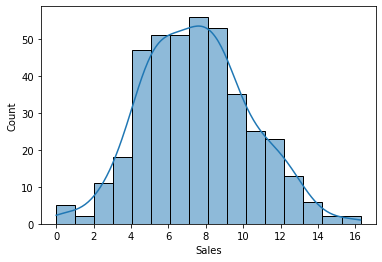

In [5]:
sns.histplot(df['Sales'], kde = True )

In [6]:
df.loc[df.Sales >=7.49,'sales']= 'high'
df.loc[df.Sales <7.49,'sales']= 'low'
df.drop('Sales', axis = 1, inplace = True)
df.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,138,73,11,276,120,Bad,42,17,Yes,Yes,high
1,111,48,16,260,83,Good,65,10,Yes,Yes,high
2,113,35,10,269,80,Medium,59,12,Yes,Yes,high
3,117,100,4,466,97,Medium,55,14,Yes,Yes,low
4,141,64,3,340,128,Bad,38,13,Yes,No,low


In [7]:
df['sales'].value_counts()

high    201
low     199
Name: sales, dtype: int64

In [8]:
label_encoder = preprocessing.LabelEncoder() 
df['Urban']= label_encoder.fit_transform(df['Urban'])
df['US']= label_encoder.fit_transform(df['US'])
df['sales']= label_encoder.fit_transform(df['sales'])
df['ShelveLoc']= label_encoder.fit_transform(df['ShelveLoc'])
df.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,138,73,11,276,120,0,42,17,1,1,0
1,111,48,16,260,83,1,65,10,1,1,0
2,113,35,10,269,80,2,59,12,1,1,0
3,117,100,4,466,97,2,55,14,1,1,1
4,141,64,3,340,128,0,38,13,1,0,1


In [9]:
# Here, High sales = 0 & Low sales = 1

In [10]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [11]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(df.iloc[:,:])
df_norm.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,0.622449,0.525253,0.379310,0.533066,0.574850,0.0,0.309091,0.875,1.0,1.0,0.0
1,0.346939,0.272727,0.551724,0.501002,0.353293,0.5,0.727273,0.000,1.0,1.0,0.0
2,0.367347,0.141414,0.344828,0.519038,0.335329,1.0,0.618182,0.250,1.0,1.0,0.0
3,0.408163,0.797980,0.137931,0.913828,0.437126,1.0,0.545455,0.500,1.0,1.0,1.0
4,0.653061,0.434343,0.103448,0.661323,0.622754,0.0,0.236364,0.375,1.0,0.0,1.0


In [12]:
df.describe()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000
mean,124.975000,68.657500,6.635000,264.840000,115.795000,1.307500,53.322500,13.900000,0.705000,0.645000,0.49750
std,15.334512,27.986037,6.650364,147.376436,23.676664,0.833475,16.200297,2.620528,0.456614,0.479113,0.50062
min,77.000000,21.000000,0.000000,10.000000,24.000000,0.000000,25.000000,10.000000,0.000000,0.000000,0.00000
25%,115.000000,42.750000,0.000000,139.000000,100.000000,1.000000,39.750000,12.000000,0.000000,0.000000,0.00000
50%,125.000000,69.000000,5.000000,272.000000,117.000000,2.000000,54.500000,14.000000,1.000000,1.000000,0.00000
75%,135.000000,91.000000,12.000000,398.500000,131.000000,2.000000,66.000000,16.000000,1.000000,1.000000,1.00000
max,175.000000,120.000000,29.000000,509.000000,191.000000,2.000000,80.000000,18.000000,1.000000,1.000000,1.00000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   CompPrice    400 non-null    int64
 1   Income       400 non-null    int64
 2   Advertising  400 non-null    int64
 3   Population   400 non-null    int64
 4   Price        400 non-null    int64
 5   ShelveLoc    400 non-null    int32
 6   Age          400 non-null    int64
 7   Education    400 non-null    int64
 8   Urban        400 non-null    int32
 9   US           400 non-null    int32
 10  sales        400 non-null    int32
dtypes: int32(4), int64(7)
memory usage: 28.2 KB


In [14]:
# Feature Extraction with Univariate Statistical Tests (Chi-squared for classification)

dataframe = df_norm
array = dataframe.values
X = array[:,:10]
Y = array[:,10]
# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)


#For regression: f_regression, mutual_info_regression
#For classification: chi2, f_classif, mutual_info_classif

[0.042 1.056 5.57  0.287 2.078 1.266 2.506 0.062 0.195 2.765]


In [15]:
# Feature Extraction with RFE

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# load data

dataframe = df_norm
array = dataframe.values
X = array[:,0:10]
Y = array[:,10]
# feature extraction
model = LogisticRegression(max_iter=400)
rfe = RFE(model)
fit = rfe.fit(X, Y)

#Num Features: 
print('Features num :',fit.n_features_)

# Feature Ranking:
print('Feature ranking',fit.ranking_)

Features num : 5
Feature ranking [1 1 1 4 1 2 1 6 3 5]


In [16]:
# Feature Importance with Extra Trees Classifier

from sklearn.tree import  DecisionTreeClassifier
# load data

dataframe = df_norm
array = dataframe.values
X = array[:,0:10]
Y = array[:,10]

# feature extraction
model = DecisionTreeClassifier()
model.fit(X, Y)
print(model.feature_importances_)

[0.14  0.108 0.08  0.036 0.285 0.156 0.127 0.068 0.    0.   ]


In [19]:
X = df.iloc[:,[1,2,3,4,5,6,8,9]]
Y = df.iloc[:,10]

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

# Building a model

In [21]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [22]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
confusion_matrix(y_test,model.predict(x_test)) #There are number of false values

array([[32, 13],
       [ 8, 27]], dtype=int64)

In [23]:
from sklearn.metrics import accuracy_score
pred_train = model.predict(x_train)
accuracy_score(y_train,pred_train)

0.740625

In [24]:
pred_test = model.predict(x_test)
accuracy_score(y_test,pred_test)

0.7375

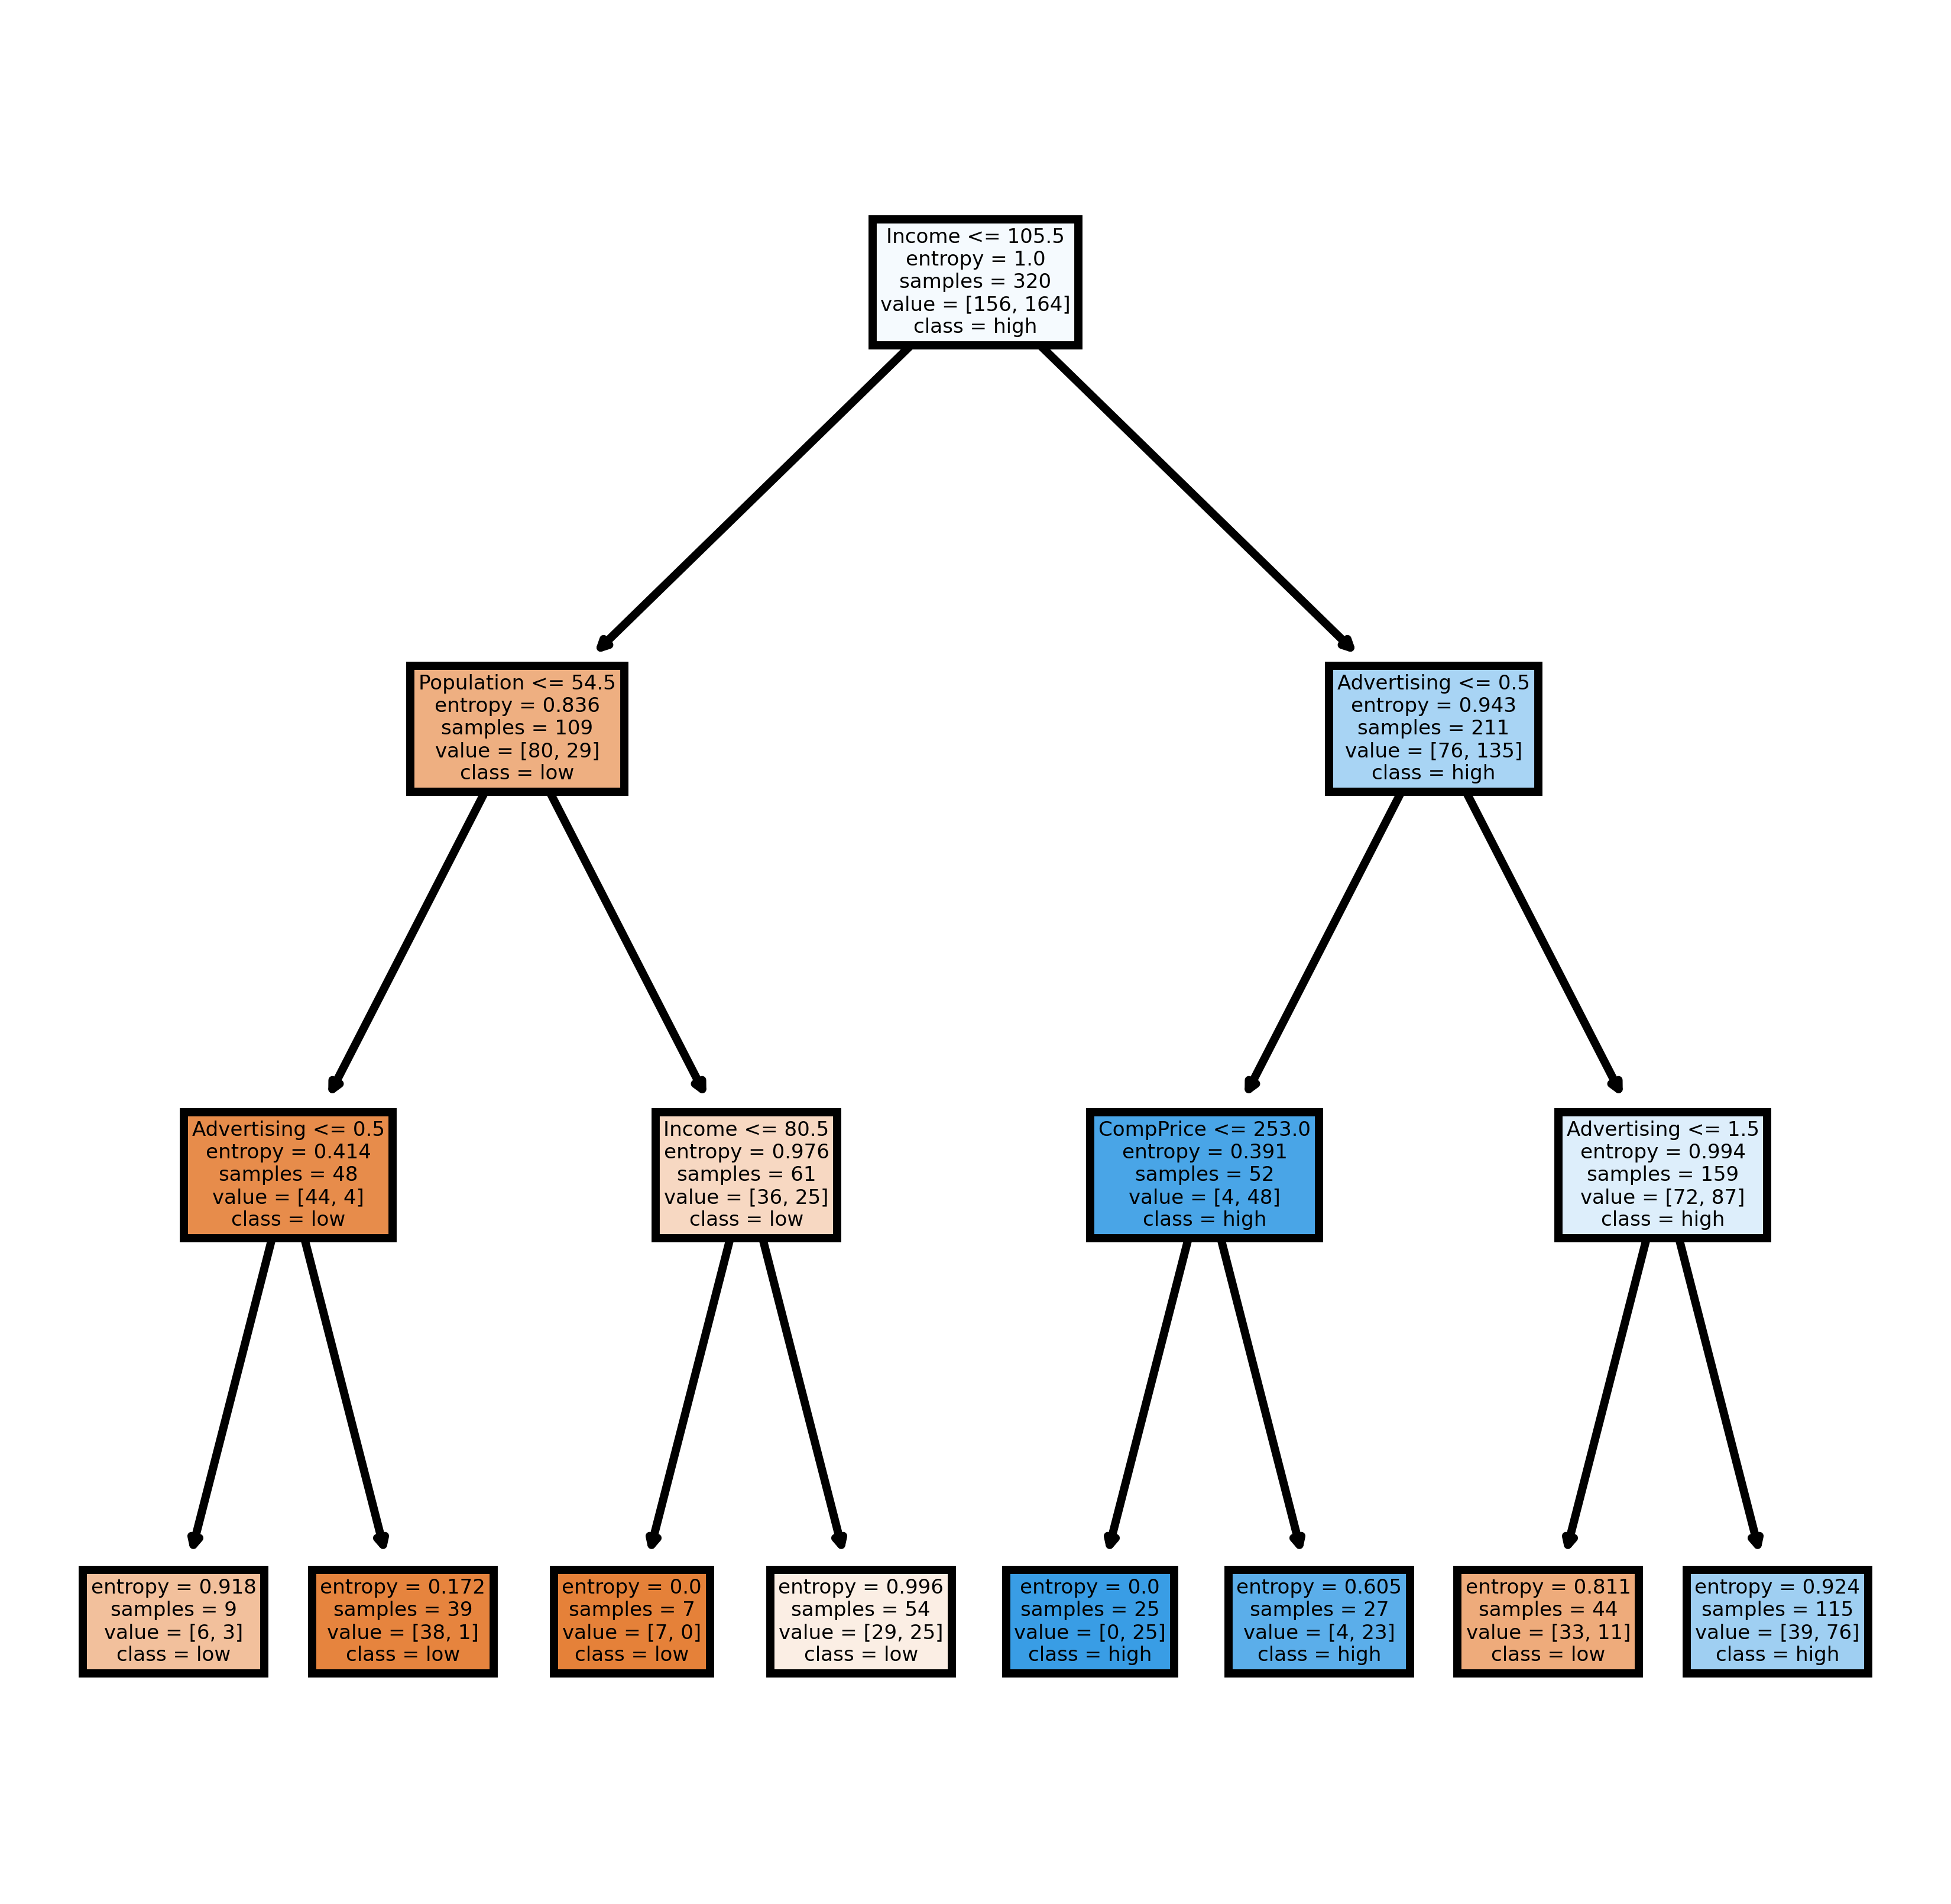

In [26]:
#PLot the decision tree
from sklearn import tree
fn=['CompPrice','Income','Advertising','Population','Price',
    'Age','Education','Urban','US','ShelveLoc_Bad','ShelveLoc_Good','ShelveLoc_Medium'] #.columns
cn=['low','high']    #.value_count.keys
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=1000)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);